In [345]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# Evaluation of the LAMP framework
To start, transform and evaluate the spring-framework
```
# Clone and checkout
cd input && git clone https://github.com/spring-projects/spring-framework.git && git checkout fa1ef1dc && cd ..

# In the TUI:
transform -in input/spring-framework/spring-core/src/main/java -out out/spring
evaluate -in out/spring -out evaluation/data/lamp-spring
```

# Designite Metrics

In [346]:
df_types = pd.read_csv('data/designite-spring/TypeMetrics.csv', usecols=["Package Name", "Type Name", "NOF", "NOM", "NOPF", "NOPM", "LOC", "WMC", "NC", "DIT", "LCOM", "FANIN", "FANOUT"])
df_types.insert(0, "DeclarableId", df_types[['Package Name', 'Type Name']].agg('.'.join, axis=1))
df_types.drop(["Package Name", "Type Name"], axis="columns", inplace=True)

df_methods = pd.read_csv('data/designite-spring/MethodMetrics.csv', usecols=["Package Name", "Type Name", "Method Name", "LOC", "CC", "PC"])
df_methods.insert(0, "DeclarableId", df_methods[['Package Name', 'Type Name']].agg('.'.join, axis=1))
df_methods["DeclarableId"] = df_methods[['DeclarableId', 'Method Name']].agg('://'.join, axis=1)
df_methods.drop(["Package Name", "Type Name", "Method Name"], axis="columns", inplace=True)

In [347]:
print(df_types)

                                          DeclarableId  NOF  NOPF  NOM  NOPM  \
0                 org.springframework.asm.CurrentFrame    0     0    2     0   
1       org.springframework.asm.RecordComponentVisitor    2     0    7     5   
2                 org.springframework.asm.MethodWriter   59     0   50    31   
3                        org.springframework.asm.Label   28     1   12     3   
4                         org.springframework.asm.Type   27    21   36    31   
..                                                 ...  ...   ...  ...   ...   
869    org.springframework.aot.generate.GeneratedClass    6     0   12     5   
870    org.springframework.aot.generate.GeneratedFiles    0     0   13     0   
871  org.springframework.aot.generate.GeneratedFile...    0     0    0     0   
872        org.springframework.aot.generate.MethodName    3     1   10     3   
873                org.springframework.aot.AotDetector    1     1    1     1   

     LOC  WMC  NC  DIT      LCOM  FANIN

In [348]:
print(df_methods)

                                           DeclarableId  LOC  CC  PC
0     org.springframework.asm.CurrentFrame://Current...    3   1   1
1        org.springframework.asm.CurrentFrame://execute    6   1   4
2     org.springframework.asm.RecordComponentVisitor...    3   1   1
3     org.springframework.asm.RecordComponentVisitor...    7   2   2
4     org.springframework.asm.RecordComponentVisitor...    3   1   0
...                                                 ...  ...  ..  ..
5571  org.springframework.aot.generate.MethodName://...    9   3   1
5572  org.springframework.aot.generate.MethodName://...    3   1   0
5573  org.springframework.aot.generate.MethodName://...    3   1   1
5574  org.springframework.aot.generate.MethodName://...   11   2   1
5575  org.springframework.aot.AotDetector://useGener...    3   1   0

[5576 rows x 4 columns]


# SonarQube metrics

In [349]:
# df_sonar = pd.read_csv('data/sonarqube-spring/CognitiveComplexity.csv', usecols=["DeclarableId","S_COCO", "S_LOC"])
# df_sonar['DeclarableId'] = df_sonar['DeclarableId'].astype(str)
# pd.to_numeric(df_sonar['S_COCO'])
# pd.to_numeric(df_sonar['S_LOC'])
# print(df_sonar)

# LAMP Metrics

In [350]:
df_modules = pd.read_csv('data/lamp-spring/modules.csv', usecols=["DeclarableId","MLOC","WMC","CWMC","DIT","NOC","CBO","RFC","LCOM","NOU","LC"])
df_units = pd.read_csv('data/lamp-spring/units.csv', usecols=["DeclarableId","ULOC","CC","COCO","PC","LLOC"])

In [351]:
df_modules.sort_values(by=["DeclarableId"])
print(df_modules)

                                          DeclarableId  MLOC  WMC  CWMC  DIT  \
0    org.springframework.cglib.core.MethodInfoTrans...    15    5     3    0   
1     org.springframework.cglib.core.internal.Function     3    1     0    0   
2    org.springframework.aot.generate.GeneratedClasses    76   12     1    0   
3    org.springframework.cglib.reflect.ConstructorD...    80    2     0    0   
4    org.springframework.cglib.transform.impl.Undec...    12    2     0    1   
..                                                 ...   ...  ...   ...  ...   
628           org.springframework.core.env.Environment     6    4     0    1   
629  org.springframework.core.type.classreading.Sim...    54   17     3    0   
630  org.springframework.cglib.transform.Annotation...    36    9     2    1   
631  org.springframework.core.annotation.MergedAnno...     6    2     0    0   
632  org.springframework.core.metrics.DefaultApplic...    34    1     0    0   

     NOC  CBO  RFC  LCOM  NOU  LC  
0  

In [352]:
print(df_units)

                                           DeclarableId  ULOC  CC  COCO  PC  \
0     org.springframework.cglib.core.MethodInfoTrans...     3   1     0   0   
1     org.springframework.cglib.core.MethodInfoTrans...     9   4     3   1   
2     org.springframework.cglib.core.internal.Functi...     1   1     0   1   
3     org.springframework.aot.generate.GeneratedClas...     3   1     0   1   
4     org.springframework.aot.generate.GeneratedClas...     7   1     0   3   
...                                                 ...   ...  ..   ...  ..   
5460  org.springframework.cglib.transform.Annotation...     3   1     0   1   
5461  org.springframework.cglib.transform.Annotation...     4   1     0   0   
5462  org.springframework.core.annotation.MergedAnno...     3   1     0   1   
5463  org.springframework.core.annotation.MergedAnno...     1   1     0   2   
5464  org.springframework.core.metrics.DefaultApplic...     3   1     0   1   

      LLOC  
0        0  
1        0  
2        0  

## Distribution analysis

In [353]:
print(df_modules.describe())

              MLOC         WMC        CWMC         DIT         NOC  \
count   633.000000  633.000000  633.000000  633.000000  633.000000   
mean     79.382306   20.303318   13.192733    0.353870    0.208531   
std     164.508019   50.158038   37.252060    0.776161    0.784011   
min       0.000000    0.000000    0.000000    0.000000    0.000000   
25%      12.000000    3.000000    0.000000    0.000000    0.000000   
50%      34.000000    8.000000    3.000000    0.000000    0.000000   
75%      79.000000   19.000000   10.000000    0.000000    0.000000   
max    2478.000000  897.000000  503.000000    4.000000    8.000000   

              CBO         RFC        LCOM         NOU          LC  
count  633.000000  633.000000  633.000000  633.000000  633.000000  
mean    43.131122   15.341232    1.838863    8.633491    0.475513  
std     89.017031   20.282900    2.425981   11.367493    1.772625  
min      0.000000    0.000000    0.000000    0.000000    0.000000  
25%      4.000000    3.000000

Within the codebase, inheritance and lambdas are rarely used.

Let's deepdive into lambdas that are used.

In [354]:
df_lambda = df_modules.loc[df_modules["LC"] > 0][['DeclarableId', 'LC']]
print(df_lambda['LC'].sum())
print(df_lambda)

301
                                          DeclarableId  LC
2    org.springframework.aot.generate.GeneratedClasses   2
4    org.springframework.cglib.transform.impl.Undec...   1
9    org.springframework.core.io.buffer.DataBufferU...  21
11   org.springframework.aot.hint.support.SpringFac...   1
15   org.springframework.core.metrics.jfr.FlightRec...   1
..                                                 ...  ..
610  org.springframework.core.codec.ResourceRegionE...   3
622    org.springframework.aot.generate.GeneratedFiles   3
623  org.springframework.cglib.reflect.MulticastDel...   1
624           org.springframework.cglib.proxy.Enhancer   2
625  org.springframework.core.annotation.MergedAnno...   2

[109 rows x 2 columns]


Lambdas are used in 5 places of the code base. These lambda statements were very short. Only describing a call to another method.

In [355]:
print(df_units.describe())

              ULOC           CC         COCO           PC         LLOC
count  5465.000000  5465.000000  5465.000000  5465.000000  5465.000000
mean      7.152608     2.351693     1.528088     1.287649     0.111985
std      16.462248     8.092552     4.558469     1.193551     1.110270
min       1.000000     1.000000     0.000000     0.000000     0.000000
25%       3.000000     1.000000     0.000000     0.000000     0.000000
50%       4.000000     1.000000     0.000000     1.000000     0.000000
75%       8.000000     2.000000     1.000000     2.000000     0.000000
max     927.000000   533.000000   155.000000    10.000000    31.000000


# Analysing module differences

In [356]:
module_diff = pd.concat([df_types["DeclarableId"], df_modules["DeclarableId"]]).drop_duplicates(keep=False)
print(module_diff)

6              org.springframework.asm.SymbolTable.Entry
26                 org.springframework.asm.Attribute.Set
36     org.springframework.core.MethodParameter.Kotli...
56     org.springframework.core.OrderComparator.Order...
58     org.springframework.core.ReactiveAdapterRegist...
                             ...                        
846    org.springframework.aot.nativex.BasicJsonWrite...
859    org.springframework.aot.generate.MethodReferen...
864    org.springframework.aot.generate.AccessControl...
871    org.springframework.aot.generate.GeneratedFile...
213    org.springframework.core.io.support.PropertySo...
Name: DeclarableId, Length: 243, dtype: object


243 Modules aren't support by the LAMP framework due to inner modules not being supported.

In [357]:
unit_diff = pd.concat([df_methods["DeclarableId"], df_units["DeclarableId"].apply(lambda s: s.split("$")[0])]).drop_duplicates(keep=False)
print(unit_diff)

0       org.springframework.asm.CurrentFrame://Current...
9       org.springframework.asm.MethodWriter://MethodW...
59                  org.springframework.asm.Label://Label
71                    org.springframework.asm.Type://Type
208                 org.springframework.asm.Frame://Frame
                              ...                        
5310    org.springframework.cglib.core.VisibilityPredi...
5328    org.springframework.cglib.reflect.MulticastDel...
5335    org.springframework.cglib.proxy.Enhancer://Enh...
5442    org.springframework.core.type.classreading.Sim...
5456    org.springframework.cglib.transform.Annotation...
Name: DeclarableId, Length: 578, dtype: object


578 Units aren't recognized by the LAMP framework at a first glance. When looking at each method precisely, we see that constructors and initializers aren't being matched by name due to their naming conventions within the LAMP framework.

In [358]:
unit_diff_with_constructors = pd.concat([df_methods["DeclarableId"], df_units["DeclarableId"].apply(lambda s:
                                                                                                        s.split("$")[0].removesuffix(".constructor").removesuffix(".initializer")
                                                                                                    )]).drop_duplicates(keep=False)
print(unit_diff_with_constructors)

614     org.springframework.core.CollectionFactory://g...
1010    org.springframework.core.codec.ResourceDecoder...
1701    org.springframework.core.annotation.MergedAnno...
1702    org.springframework.core.annotation.MergedAnno...
1703    org.springframework.core.annotation.MergedAnno...
                              ...                        
1965    org.springframework.core.KotlinDetector://Kotl...
2042    org.springframework.core.annotation.Introspect...
2044    org.springframework.core.annotation.Introspect...
2728    org.springframework.util.MimeTypeUtils://MimeT...
3450    org.springframework.cglib.core.TinyBitSet://Ti...
Name: DeclarableId, Length: 68, dtype: object


After removing the .constructor and .initializer from the declarable id, we see that these units are now matched to their corresponding method ids from designite.
This leaves us with the analysis of the remaining 68 units that aren't getting matched. These are units:

- Enum declarations by the LAMP framework, these aren't evaluated by Designite.
- Anonymous class declarations: these aren't evaluated by the LAMP framework
- Inner Module Units: these aren't evaluated by the LAMP framework.

# Metric performance

In [359]:
types = df_types
methods = df_methods

mods = df_modules
units = df_units

types.rename(columns=lambda x: "D_" + x, inplace=True)
types.rename({"D_DeclarableId": "DeclarableId"}, axis=1, inplace=True)

methods.rename(columns=lambda x: "D_" + x, inplace=True)
methods.rename({"D_DeclarableId": "DeclarableId"}, axis=1, inplace=True)

mods.rename(columns=lambda x: "L_" + x, inplace=True)
mods.rename({"L_DeclarableId": "DeclarableId"}, axis=1, inplace=True)

units.rename(columns=lambda x: "L_" + x, inplace=True)
units.rename({"L_DeclarableId": "DeclarableId"}, axis=1, inplace=True)
units["DeclarableId"] = units["DeclarableId"].apply(lambda s: s.split("$")[0].removesuffix(".constructor").removesuffix(".initializer"))

In [360]:
m_mods = pd.merge(types, mods, on="DeclarableId")
# m_mods = pd.merge(m_mods, df_sonar, on="DeclarableId")
print(m_mods)

                                          DeclarableId  D_NOF  D_NOPF  D_NOM  \
0                 org.springframework.asm.CurrentFrame      0       0      2   
1       org.springframework.asm.RecordComponentVisitor      2       0      7   
2                 org.springframework.asm.MethodWriter     59       0     50   
3                        org.springframework.asm.Label     28       1     12   
4                         org.springframework.asm.Type     27      21     36   
..                                                 ...    ...     ...    ...   
627  org.springframework.aot.generate.InMemoryGener...      1       0      4   
628    org.springframework.aot.generate.GeneratedClass      6       0     12   
629    org.springframework.aot.generate.GeneratedFiles      0       0     13   
630        org.springframework.aot.generate.MethodName      3       1     10   
631                org.springframework.aot.AotDetector      1       1      1   

     D_NOPM  D_LOC  D_WMC  D_NC  D_DIT 

In [361]:
m_units = pd.merge(methods, units, on=["DeclarableId"])
print(m_units)

                                           DeclarableId  D_LOC  D_CC  D_PC  \
0     org.springframework.asm.CurrentFrame://Current...      3     1     1   
1        org.springframework.asm.CurrentFrame://execute      6     1     4   
2     org.springframework.asm.RecordComponentVisitor...      3     1     1   
3     org.springframework.asm.RecordComponentVisitor...      3     1     1   
4     org.springframework.asm.RecordComponentVisitor...      7     2     2   
...                                                 ...    ...   ...   ...   
8595  org.springframework.aot.generate.MethodName://...      9     3     1   
8596  org.springframework.aot.generate.MethodName://...      3     1     0   
8597  org.springframework.aot.generate.MethodName://...      3     1     1   
8598  org.springframework.aot.generate.MethodName://...     11     2     1   
8599  org.springframework.aot.AotDetector://useGener...      3     1     0   

      L_ULOC  L_CC  L_COCO  L_PC  L_LLOC  
0          3     1  

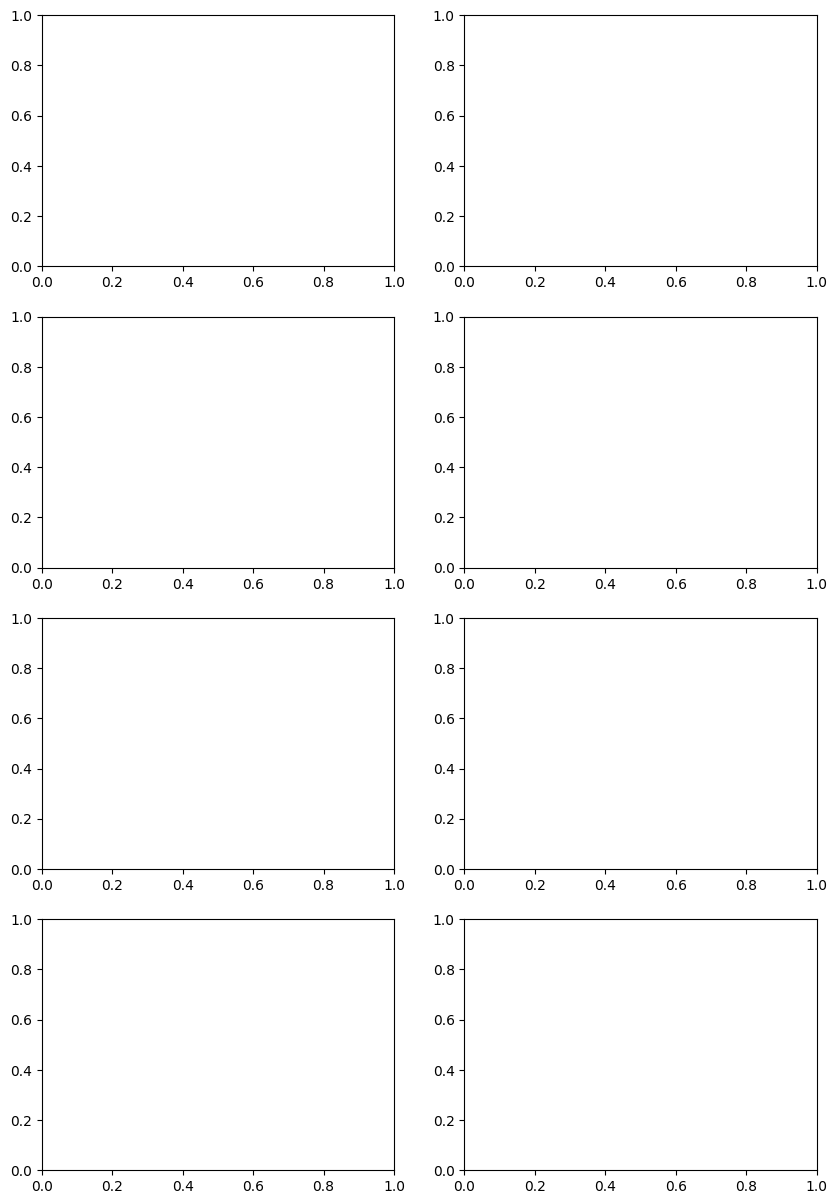

In [362]:
figure, axis = plt.subplots(4, 2, figsize=(10, 15))

## Module Lines Of Code

In [363]:
mloc = m_mods[['DeclarableId', 'D_LOC', 'L_MLOC']]
print(mloc)

                                          DeclarableId  D_LOC  L_MLOC
0                 org.springframework.asm.CurrentFrame     18      12
1       org.springframework.asm.RecordComponentVisitor     84      47
2                 org.springframework.asm.MethodWriter      0    1616
3                        org.springframework.asm.Label    334     188
4                         org.springframework.asm.Type      0     463
..                                                 ...    ...     ...
627  org.springframework.aot.generate.InMemoryGener...     51      29
628    org.springframework.aot.generate.GeneratedClass     95      68
629    org.springframework.aot.generate.GeneratedFiles    131      57
630        org.springframework.aot.generate.MethodName     83      61
631                org.springframework.aot.AotDetector     18       6

[632 rows x 3 columns]


In [364]:
x1 = mloc['D_LOC']
# x2 = mloc['S_LOC']
x3 = mloc['L_MLOC']

subplot = axis[0, 0]

# Plot
subplot.hist([x1, x3], bins=np.linspace(0, 1000, 30), density=True, color=['#3C5DA1', '#469B55'], label=['Designite', 'LAMP'])
subplot.set(title= "MLOC Distribution", xlabel= 'Module Lines of Code', ylabel='Density')
subplot.legend()
# subplot.savefig('images/spring-MLOC.png')

## Module Number Of Units

In [365]:
nou = m_mods[['DeclarableId', 'D_NOM', 'L_NOU']]
print(nou)

                                          DeclarableId  D_NOM  L_NOU
0                 org.springframework.asm.CurrentFrame      2      2
1       org.springframework.asm.RecordComponentVisitor      7      7
2                 org.springframework.asm.MethodWriter     50     50
3                        org.springframework.asm.Label     12     12
4                         org.springframework.asm.Type     36     36
..                                                 ...    ...    ...
627  org.springframework.aot.generate.InMemoryGener...      4      4
628    org.springframework.aot.generate.GeneratedClass     12     12
629    org.springframework.aot.generate.GeneratedFiles     13     13
630        org.springframework.aot.generate.MethodName     10     10
631                org.springframework.aot.AotDetector      1      1

[632 rows x 3 columns]


In [366]:
x1 = m_mods['D_NOM']
x2 = m_mods['L_NOU']

subplot = axis[0, 1]

# Plot
subplot.hist([x1, x2], bins=np.linspace(0, 50, 30), density=True, color=['#3C5DA1', '#469B55'], label=['Designite', 'LAMP'])
subplot.set(title= "NOU Distribution", xlabel= 'Number of Units', ylabel='Density')
subplot.legend()
# plt.savefig('images/spring-NOU.png')
# plt.show()

## Module Weighted Method per Class (WMC)

In [367]:
wmc = m_mods[['DeclarableId', 'D_WMC', 'L_WMC']]
print(wmc)

                                          DeclarableId  D_WMC  L_WMC
0                 org.springframework.asm.CurrentFrame      2      2
1       org.springframework.asm.RecordComponentVisitor     12     18
2                 org.springframework.asm.MethodWriter    299    401
3                        org.springframework.asm.Label     36     47
4                         org.springframework.asm.Type    154    173
..                                                 ...    ...    ...
627  org.springframework.aot.generate.InMemoryGener...      5      6
628    org.springframework.aot.generate.GeneratedClass     13     15
629    org.springframework.aot.generate.GeneratedFiles     16     16
630        org.springframework.aot.generate.MethodName     15     20
631                org.springframework.aot.AotDetector      1      2

[632 rows x 3 columns]


In [368]:
x1 = m_mods['D_WMC']
x2 = m_mods['L_WMC']

subplot = axis[1, 0]

# Plot
subplot.hist([x1, x2], bins=np.linspace(0, 100, 30), density=True,color=['#3C5DA1', '#469B55'],  label=['Designite', 'LAMP'])
subplot.set(title= "WMC Distribution", xlabel= 'Weighted Methods per Class', ylabel='Density')
subplot.legend()
# plt.savefig('images/spring-WMC.png')
# plt.show()

## Module - Cognitively Weighted Method per Class (CWMC)

In [369]:
# cwmc = m_mods[['DeclarableId', 'S_COCO', 'L_CWMC']].copy()
# print(cwmc)

In [370]:
# cwmc["Diff"] = cwmc["S_COCO"] - cwmc["L_CWMC"]
# print(cwmc.loc[cwmc["Diff"] > 5])

In [371]:
# x1 = m_mods['S_COCO']
# x2 = m_mods['L_CWMC']
#
# # Plot
# plt.hist([x1, x2], bins=np.linspace(0, 100, 30), density=True, color=['#B53941', '#469B55'], label=['SonarQube', 'LAMP'])
# plt.gca().set(title= "CWMC Distribution", xlabel= 'Cognitively Weighted Methods per Class', ylabel='Density')
# plt.legend()
# plt.savefig('images/spring-CWMC.png')
# plt.show()

## Module Depth of Inheritance (DIT)

In [372]:
dit = m_mods[['DeclarableId', 'D_DIT', 'L_DIT']]
print(dit)

                                          DeclarableId  D_DIT  L_DIT
0                 org.springframework.asm.CurrentFrame      1      1
1       org.springframework.asm.RecordComponentVisitor      0      0
2                 org.springframework.asm.MethodWriter      1      1
3                        org.springframework.asm.Label      0      0
4                         org.springframework.asm.Type      0      0
..                                                 ...    ...    ...
627  org.springframework.aot.generate.InMemoryGener...      1      0
628    org.springframework.aot.generate.GeneratedClass      0      0
629    org.springframework.aot.generate.GeneratedFiles      0      0
630        org.springframework.aot.generate.MethodName      0      0
631                org.springframework.aot.AotDetector      0      0

[632 rows x 3 columns]


In [373]:
dit["Diff"] = dit["D_DIT"] - dit["L_DIT"]
print(dit.loc[dit["Diff"] > 0])

                                          DeclarableId  D_DIT  L_DIT  Diff
42   org.springframework.core.DefaultParameterNameD...      2      1     1
54   org.springframework.core.LocalVariableTablePar...      1      0     1
59        org.springframework.core.SimpleAliasRegistry      1      0     1
70   org.springframework.core.KotlinReflectionParam...      1      0     1
72   org.springframework.core.AttributeAccessorSupport      1      0     1
..                                                 ...    ...    ...   ...
616  org.springframework.aot.generate.FileSystemGen...      1      0     1
618  org.springframework.aot.generate.GeneratedType...      2      1     1
621  org.springframework.aot.generate.AppendableCon...      1      0     1
626  org.springframework.aot.generate.DefaultGenera...      1      0     1
627  org.springframework.aot.generate.InMemoryGener...      1      0     1

[200 rows x 4 columns]


/var/folders/yg/_h7_f_ps1g53dn06sw9cr3gr0000gn/T/ipykernel_13950/1400901144.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dit["Diff"] = dit["D_DIT"] - dit["L_DIT"]


In [374]:
x1 = m_mods['D_DIT']
x2 = m_mods['L_DIT']

subplot = axis[1, 1]

# Plot
subplot.hist([x1, x2], bins=np.linspace(0, 6, 10), density=True,color=['#3C5DA1', '#469B55'],  label=['Designite', 'LAMP'])
subplot.set(title= "DIT Distribution", xlabel= 'Depth of Inheritance Tree', ylabel='Density')
subplot.legend()
# plt.savefig('images/spring-DIT.png')
# plt.show()

## Module - Number of Children

In [375]:
noc = m_mods[['DeclarableId', 'D_NC', 'L_NOC']]
print(noc)

                                          DeclarableId  D_NC  L_NOC
0                 org.springframework.asm.CurrentFrame     0      0
1       org.springframework.asm.RecordComponentVisitor     1      1
2                 org.springframework.asm.MethodWriter     0      0
3                        org.springframework.asm.Label     0      0
4                         org.springframework.asm.Type     0      0
..                                                 ...   ...    ...
627  org.springframework.aot.generate.InMemoryGener...     0      0
628    org.springframework.aot.generate.GeneratedClass     0      0
629    org.springframework.aot.generate.GeneratedFiles     2      0
630        org.springframework.aot.generate.MethodName     0      0
631                org.springframework.aot.AotDetector     0      0

[632 rows x 3 columns]


In [376]:
x1 = m_mods['D_NC']
x2 = m_mods['L_NOC']

subplot = axis[2, 0]

# Plot
subplot.hist([x1, x2], bins=np.linspace(0, 10, 10), density=True,color=['#3C5DA1', '#469B55'],  label=['Designite', 'LAMP'])
subplot.set(title= "NOC Distribution", xlabel= 'Number of Children', ylabel='Density')
subplot.legend()
# plt.savefig('images/spring-NOC.png')
# plt.show()

## Module - Lack of Cohesion in Methods (LCOM)

In [377]:
lcom = m_mods[['DeclarableId', 'D_LCOM', 'L_LCOM']]
print(lcom)

                                          DeclarableId    D_LCOM  L_LCOM
0                 org.springframework.asm.CurrentFrame -1.000000       2
1       org.springframework.asm.RecordComponentVisitor  0.000000       1
2                 org.springframework.asm.MethodWriter  0.060000       3
3                        org.springframework.asm.Label  0.416667       2
4                         org.springframework.asm.Type  0.083333       3
..                                                 ...       ...     ...
627  org.springframework.aot.generate.InMemoryGener...  0.000000       1
628    org.springframework.aot.generate.GeneratedClass  0.000000       1
629    org.springframework.aot.generate.GeneratedFiles -1.000000       2
630        org.springframework.aot.generate.MethodName  0.200000       1
631                org.springframework.aot.AotDetector  0.000000       1

[632 rows x 3 columns]


## Unit - Lines of Code

In [378]:
uloc = m_units[['DeclarableId', 'D_LOC', 'L_ULOC']]
print(uloc)

                                           DeclarableId  D_LOC  L_ULOC
0     org.springframework.asm.CurrentFrame://Current...      3       3
1        org.springframework.asm.CurrentFrame://execute      6       7
2     org.springframework.asm.RecordComponentVisitor...      3       3
3     org.springframework.asm.RecordComponentVisitor...      3      14
4     org.springframework.asm.RecordComponentVisitor...      7       3
...                                                 ...    ...     ...
8595  org.springframework.aot.generate.MethodName://...      9       9
8596  org.springframework.aot.generate.MethodName://...      3       3
8597  org.springframework.aot.generate.MethodName://...      3       4
8598  org.springframework.aot.generate.MethodName://...     11      11
8599  org.springframework.aot.AotDetector://useGener...      3       3

[8600 rows x 3 columns]


## Unit - Cyclomatic Complexity

In [379]:
cc = m_units[['DeclarableId', 'D_CC', 'L_CC']]
print(cc)

                                           DeclarableId  D_CC  L_CC
0     org.springframework.asm.CurrentFrame://Current...     1     1
1        org.springframework.asm.CurrentFrame://execute     1     1
2     org.springframework.asm.RecordComponentVisitor...     1     1
3     org.springframework.asm.RecordComponentVisitor...     1     8
4     org.springframework.asm.RecordComponentVisitor...     2     1
...                                                 ...   ...   ...
8595  org.springframework.aot.generate.MethodName://...     3     4
8596  org.springframework.aot.generate.MethodName://...     1     2
8597  org.springframework.aot.generate.MethodName://...     1     1
8598  org.springframework.aot.generate.MethodName://...     2     5
8599  org.springframework.aot.AotDetector://useGener...     1     2

[8600 rows x 3 columns]


In [380]:
x1 = m_units['D_CC']
x2 = m_units['L_CC']

subplot = axis[2, 1]

# Plot
subplot.hist([x1, x2], bins=np.linspace(0, 10, 10), density=True,color=['#3C5DA1', '#469B55'],  label=['Designite', 'LAMP'])
subplot.set(title= "CC Distribution", xlabel= 'Cyclomatic Complexity', ylabel='Density')
subplot.legend()
# plt.savefig('images/spring-CC.png')
# plt.show()

## Unit - Parameter Count

In [381]:
pc = m_units[['DeclarableId', 'D_PC', 'L_PC']]
print(pc)

                                           DeclarableId  D_PC  L_PC
0     org.springframework.asm.CurrentFrame://Current...     1     1
1        org.springframework.asm.CurrentFrame://execute     4     4
2     org.springframework.asm.RecordComponentVisitor...     1     1
3     org.springframework.asm.RecordComponentVisitor...     1     2
4     org.springframework.asm.RecordComponentVisitor...     2     1
...                                                 ...   ...   ...
8595  org.springframework.aot.generate.MethodName://...     1     1
8596  org.springframework.aot.generate.MethodName://...     0     0
8597  org.springframework.aot.generate.MethodName://...     1     1
8598  org.springframework.aot.generate.MethodName://...     1     1
8599  org.springframework.aot.AotDetector://useGener...     0     0

[8600 rows x 3 columns]


In [382]:
x1 = m_units['D_PC']
x2 = m_units['L_PC']

subplot = axis[3, 0]

# Plot
subplot.hist([x1, x2], bins=np.linspace(0, 10, 10), density=True,color=['#3C5DA1', '#469B55'],  label=['Designite', 'LAMP'])
subplot.set(title= "PC Distribution", xlabel= 'Parameter Count', ylabel='Density')
subplot.legend()
# plt.savefig('images/spring-PC.png')
# plt.show()

In [383]:
figure.delaxes(axis[3, 1])

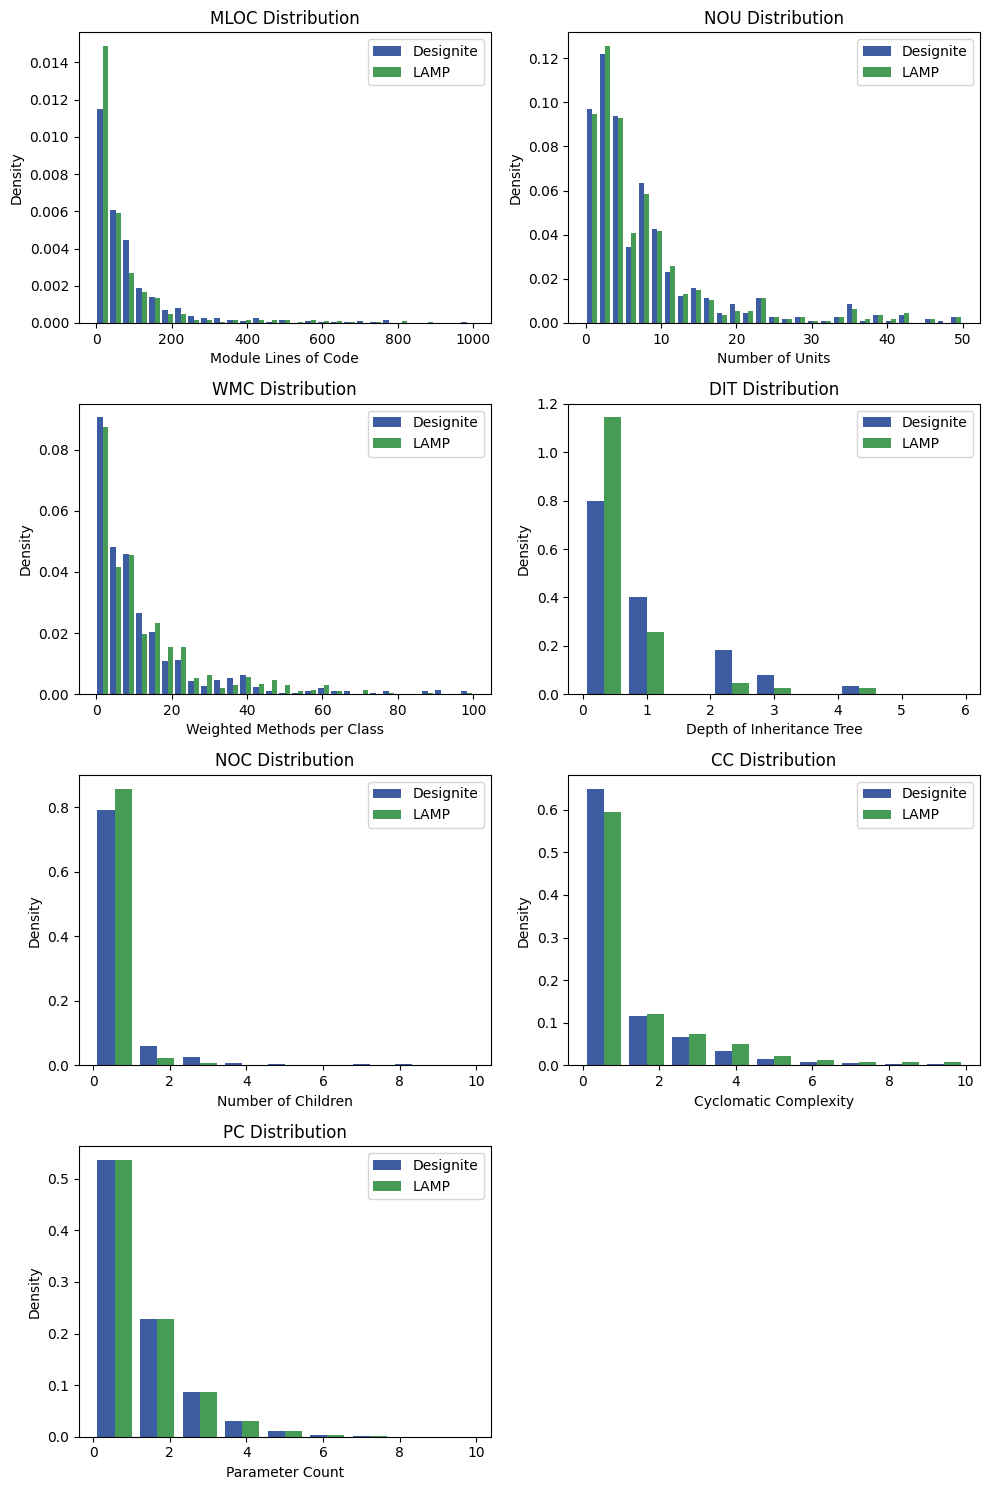

In [384]:
figure.tight_layout()
figure.savefig('images/spring-metrics.png')
figure